# Decision Tree

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pydot
import graphviz
from sklearn import tree
%matplotlib inline

In [106]:
df = pd.read_csv('/Users/lesson6_mac/AtomData/python/Mushroom/agaricus-lepiota.csv', header=None)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
0     8124 non-null object
1     8124 non-null object
2     8124 non-null object
3     8124 non-null object
4     8124 non-null object
5     8124 non-null object
6     8124 non-null object
7     8124 non-null object
8     8124 non-null object
9     8124 non-null object
10    8124 non-null object
11    8124 non-null object
12    8124 non-null object
13    8124 non-null object
14    8124 non-null object
15    8124 non-null object
16    8124 non-null object
17    8124 non-null object
18    8124 non-null object
19    8124 non-null object
20    8124 non-null object
21    8124 non-null object
22    8124 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [108]:
label = []
data = []

In [109]:
for row_index, row in df.iterrows():
    label.append(row.ix[0])
    row_data = []
    for v in  row.ix[1:]:
        row_data.append(ord(v))
    data.append(row_data)


In [114]:
print(data)

[[120, 115, 110, 116, 112, 102, 99, 110, 107, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 121, 116, 97, 102, 99, 98, 107, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 103], [98, 115, 119, 116, 108, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 109], [120, 121, 119, 116, 112, 102, 99, 110, 110, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 103, 102, 110, 102, 119, 98, 107, 116, 101, 115, 115, 119, 119, 112, 119, 111, 101, 110, 97, 103], [120, 121, 121, 116, 97, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 107, 110, 103], [98, 115, 119, 116, 97, 102, 99, 98, 103, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 107, 110, 109], [98, 121, 119, 116, 108, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 115, 109], [120, 121, 119, 116, 112, 102, 99, 110, 112, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 118, 103], [98, 115, 121, 11

In [127]:
df1 = pd.DataFrame(data, columns=f_names)

In [153]:
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103


In [154]:
aaa = {}
for i in df1.columns:
    aaa[i] = list(map(lambda x: chr(x) , df1[i]))
pd.DataFrame(aaa).head()

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,veil-type
0,t,n,x,s,f,k,n,c,u,p,...,p,k,w,w,e,e,s,s,w,p
1,t,y,x,s,f,k,b,c,g,a,...,p,n,w,w,c,e,s,s,w,p
2,t,w,b,s,f,n,b,c,m,l,...,p,n,w,w,c,e,s,s,w,p
3,t,w,x,y,f,n,n,c,u,p,...,p,k,w,w,e,e,s,s,w,p
4,f,g,x,s,f,k,b,w,g,n,...,e,n,w,w,e,t,s,s,w,p


In [116]:
data_train, data_test, label_train, label_test = train_test_split(data, label)
clf = DecisionTreeClassifier()
clf.fit(data_train, label_train)
pred = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pred)
cl_report = metrics.classification_report(label_test, pred)
print(cl_report)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1120
           p       1.00      1.00      1.00       911

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [125]:
len(label_train)

6093

In [118]:
f_names = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',\
           'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',\
          'veil-color','ring-number','ring-type','spore-print-color','population','habitat']

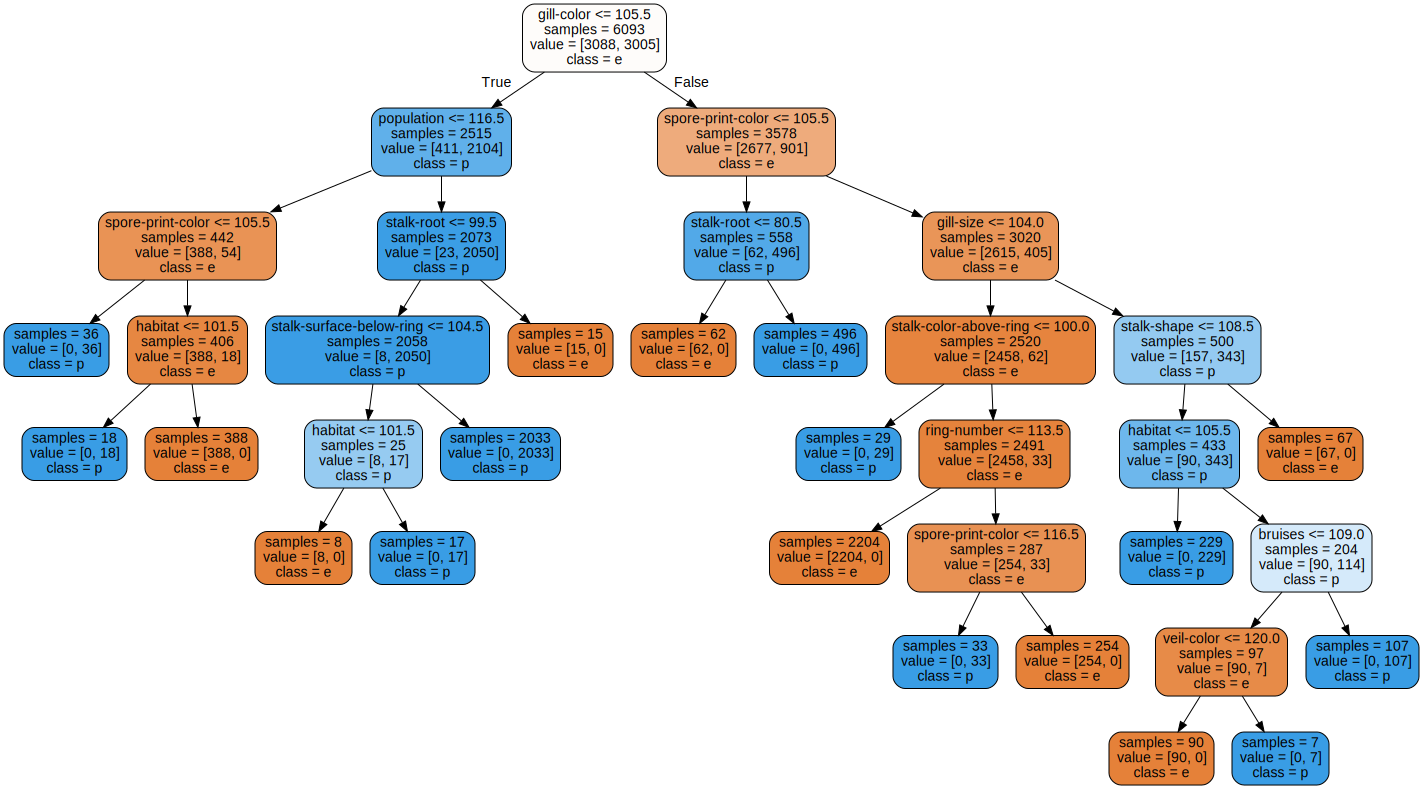

In [119]:
dot_data = export_graphviz(clf, out_file=None, impurity=False, filled=True, rounded=True, special_characters=False,feature_names=f_names,\
                           class_names=['e','p']) 
graph = graphviz.Source(dot_data)
graph

## iris 의사결정트리

In [75]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [76]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df1 = pd.DataFrame(iris['target'], columns=['target_name'])
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
df1['target_name'] = np.select([iris['target']==0, iris['target']==1,iris['target']==2], \
                                                    [iris['target_names'][0],iris['target_names'][1],iris['target_names'][2]])

In [72]:
df = pd.concat([df,df1],axis=1)


In [73]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df, df1)

In [90]:
df.columns[0:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

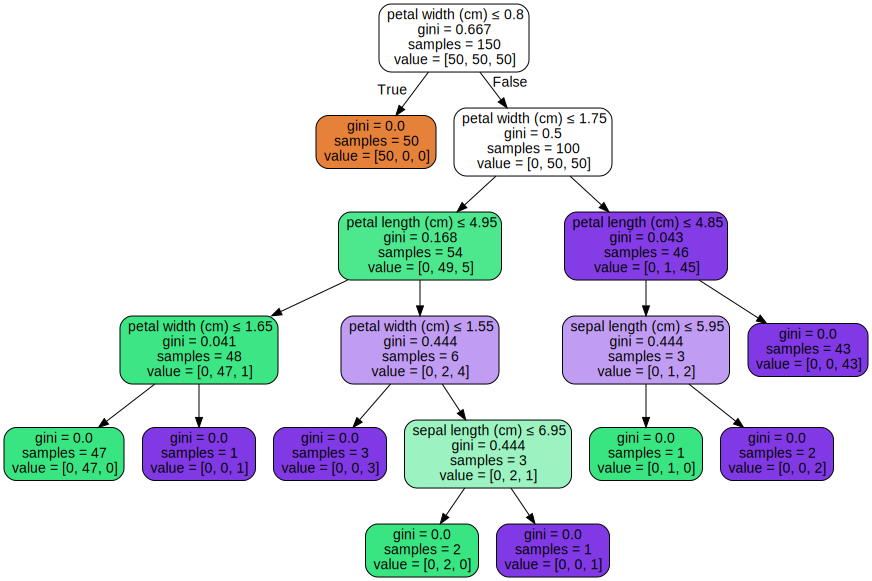

In [91]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns,\
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## 개인 데이터 의사결정트리

In [155]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/trial2/all.xlsx')
df.head()

,temp,wind,rain,humi,dew,snow,accident
0,-5.35,1.50,0.00,70.0,-9.85,0.0,0
1,-5.75,1.35,0.00,71.5,-9.85,0.0,0
2,-2.95,1.50,0.00,69.5,-6.15,0.0,0
3,-0.25,2.30,0.25,70.5,-3.45,0.0,0
4,0.80,3.90,0.00,69.5,-2.25,0.0,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210143 entries, 0 to 52565
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null int64
dtypes: float64(6), int64(1)
memory usage: 12.8 MB


In [170]:
df.accident.value_counts()

0    191345
1     18798
Name: accident, dtype: int64

In [179]:
# 결과 데이터 갯수 샘플링
df1 = df[df['accident']==1].append(df[df['accident']==0].sample(n = 18798)).reset_index(drop=True)

In [180]:
# 테스트 - 트레이닝 데이터 나누기
data_train, data_test, result_train, result_test = train_test_split(df1.iloc[:,0:6],df1.iloc[:, 6] )

In [181]:
# 데이터 트레이닝
clf = DecisionTreeClassifier(criterion='gini').fit(data_train, result_train)

In [182]:
# 예측값 정리
pred = clf.predict(data_test)
ac_score = metrics.accuracy_score(result_test, pred)
cl_report = metrics.classification_report(result_test, pred)

In [183]:
ac_score

0.5918714756889031

In [184]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      4678
           1       0.60      0.58      0.59      4721

    accuracy                           0.59      9399
   macro avg       0.59      0.59      0.59      9399
weighted avg       0.59      0.59      0.59      9399



In [188]:
# 그래프 그리기
dot_data = export_graphviz(clf, out_file=None, impurity=False, filled=True, rounded=True, special_characters=False,\
                           feature_names=df1.columns[0:6], class_names=['무사고','사고발생']) 
graph = graphviz.Source(dot_data)
graph.render("/Users/lesson6_mac/Downloads/TeamProject/trial2/all")

'/Users/lesson6_mac/Downloads/TeamProject/trial2/all.pdf'